**AF6. Aprendizaje supervisado, arbol de decision**



Integrantes del equipo:

Brisseida Esmeralda González Cabriales 1974257

Jesús Alberto Flores Garza 1910136

Andrea Mariana Sánchez García 1958455

María José Contreras Aguilar 2132131

Kevin Hernández Bautista 2127895

Hora:N4 Grupo:008

**Entrenamiento y realizacion de un arbol de decision sobre el dataset Breast Cancer Wisconsin (Disgnostic)**

1. Cargar librerias

In [1]:
#1. Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Carga de datos

In [2]:
 #2. Carga de datos
data = pd.read_csv("breast+cancer+wisconsin+diagnostic.csv")

In [4]:
# Mostrar algunos datos
print("Dimensiones del dataset:", data.shape)
data.head(10)

Dimensiones del dataset: (569, 32)


,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


3. Procesamiento de datos

In [5]:
# Mapear diagnosis como en sklearn (0 = maligno, 1 = benigno)
labels = data["Diagnosis"].map({"M": 0, "B": 1})
features = data.drop(columns=["ID", "Diagnosis", "Unnamed: 32"], errors="ignore")  # quitar columnas no numéricas

# División de datos (80% entrenamiento, 20% prueba)
train_data, test_data, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

4. Selección y entrenamiento del modelo

In [6]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(train_data, train_labels)


DecisionTreeClassifier(random_state=42)

5. Prueba del modelo

Precisión del modelo: 0.9473684210526315

Reporte de clasificación:
               precision    recall  f1-score   support

     Maligno       0.93      0.93      0.93        43
     Benigno       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



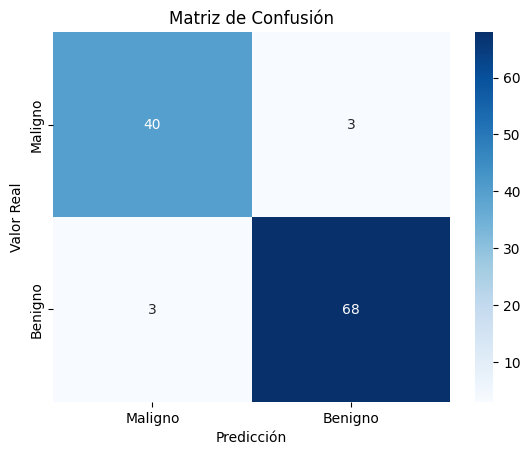

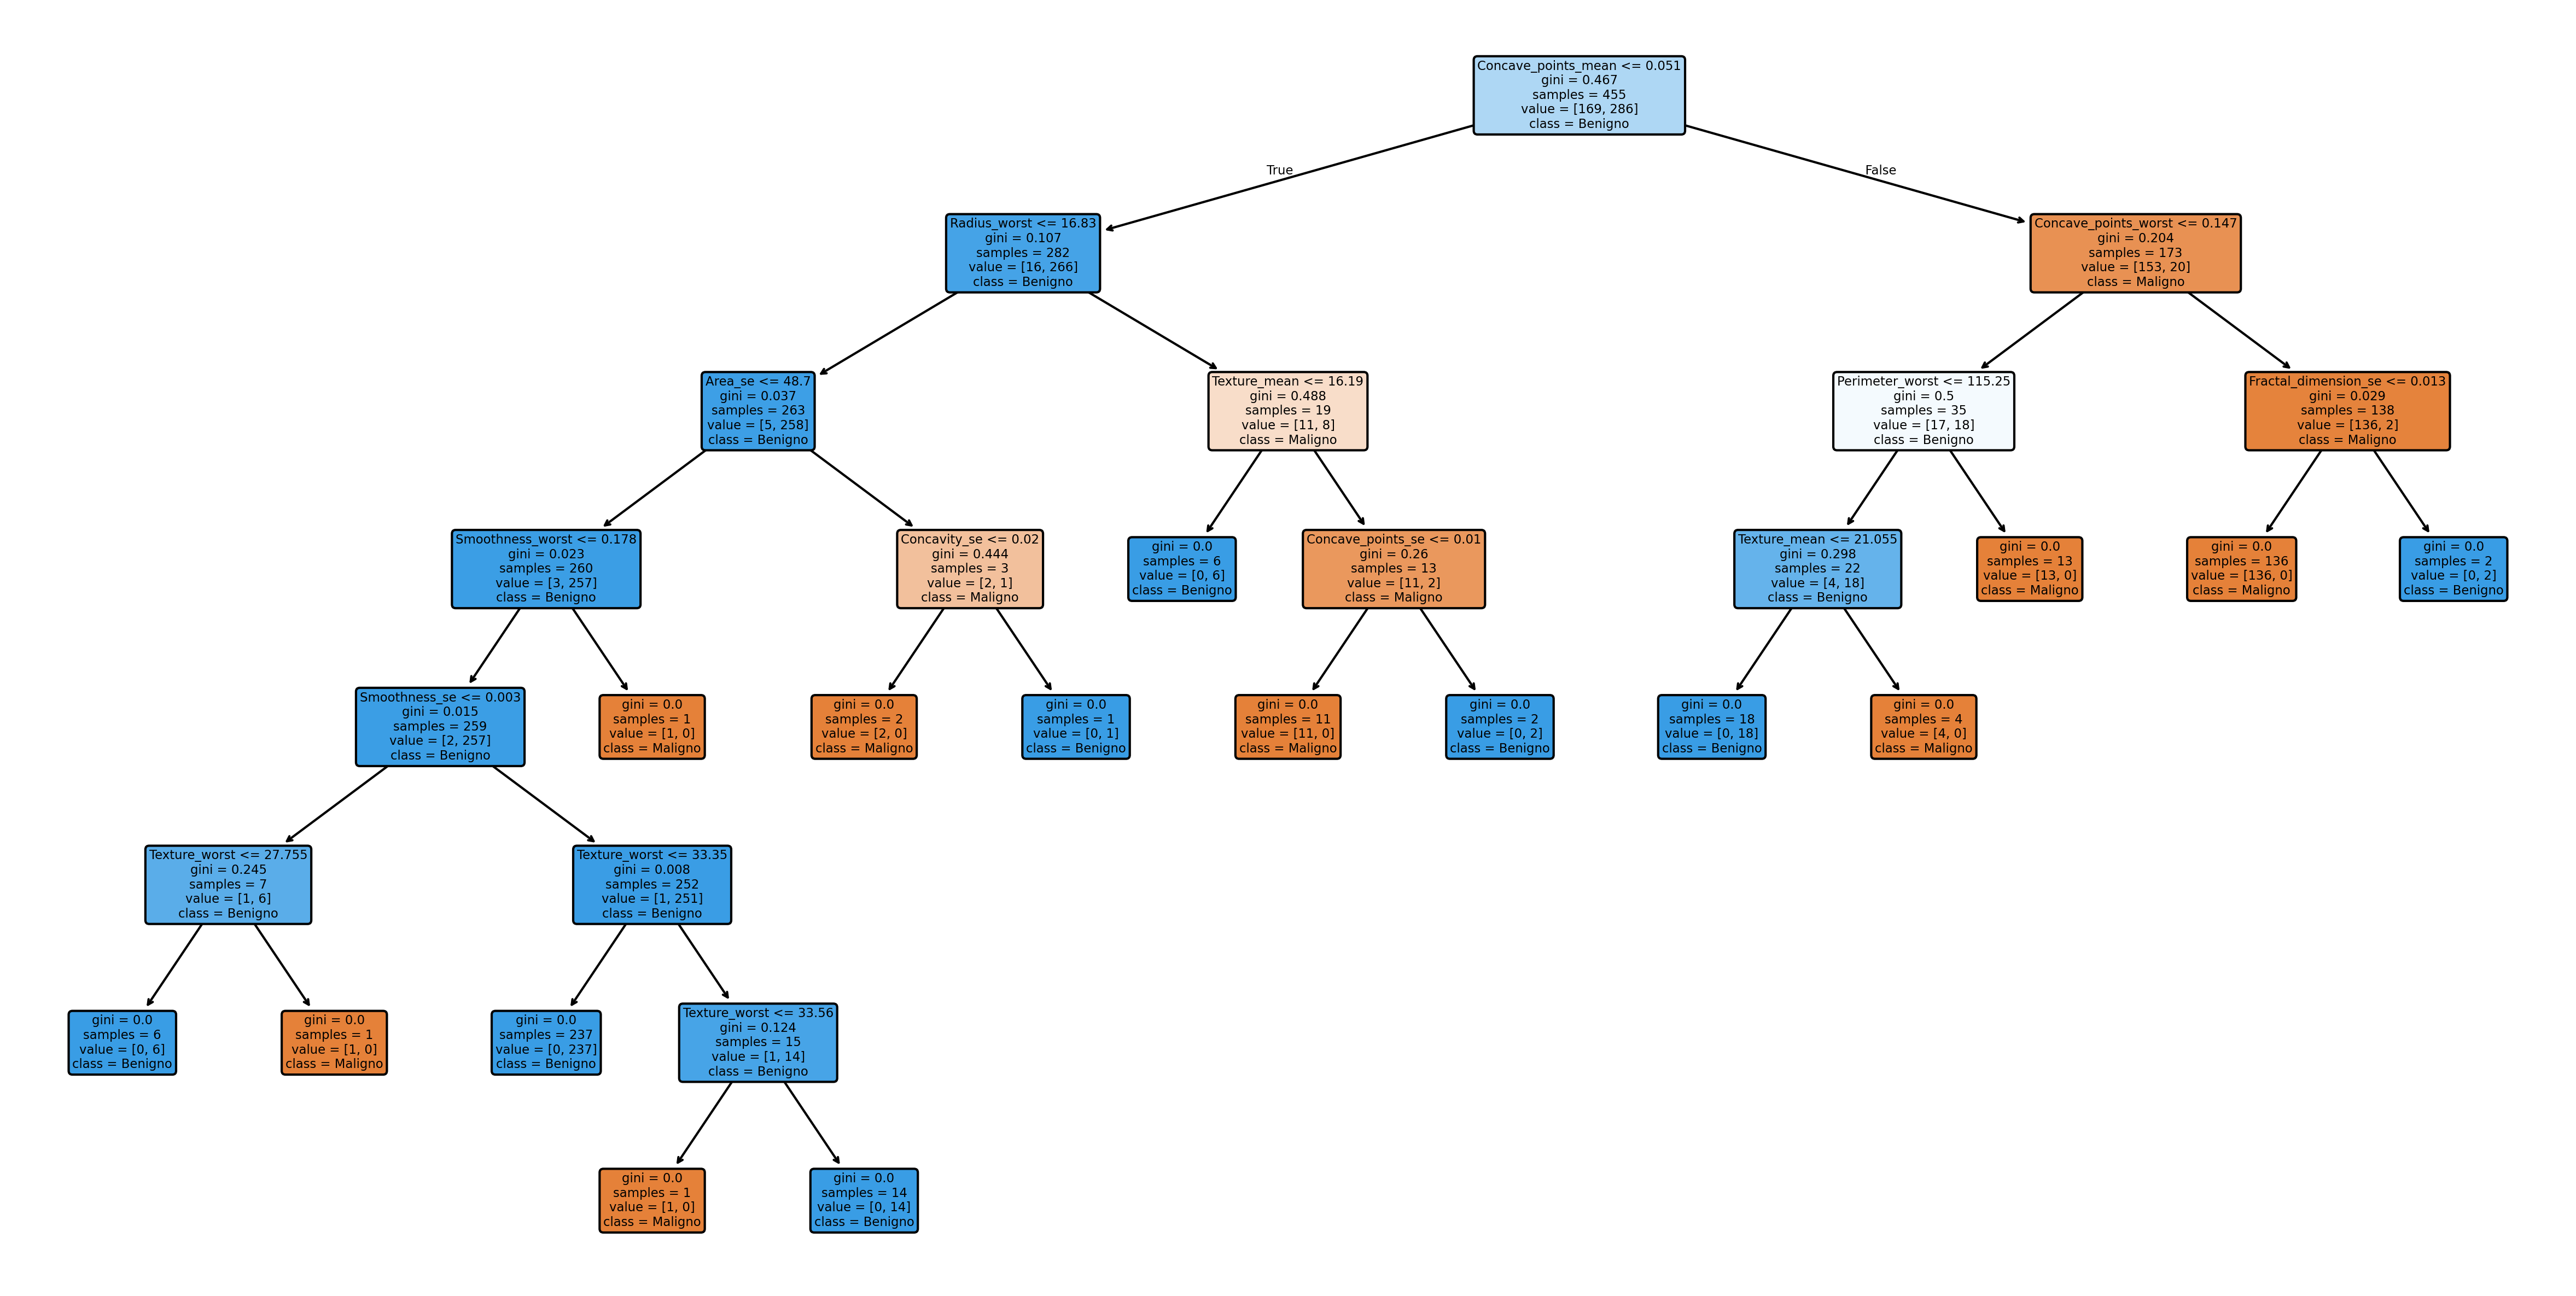

In [7]:
# Predicciones
y_pred = tree_model.predict(test_data)

# Precisión
accuracy = accuracy_score(test_labels, y_pred)
print("Precisión del modelo:", accuracy)

# Reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(test_labels, y_pred, target_names=["Maligno", "Benigno"]))

# Matriz de confusión
conf_matrix = confusion_matrix(test_labels, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Maligno", "Benigno"],
            yticklabels=["Maligno", "Benigno"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

# Visualización del árbol de decisión con dpi=300
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(tree_model, feature_names=features.columns,
          class_names=["Maligno", "Benigno"],
          filled=True, rounded=True)
plt.show()